In [35]:
import duckdb

# DuckDB veritabanını başlat
conn = duckdb.connect()

# Veriyi csv dosyasından yükle
conn.execute("CREATE TABLE capstone_data AS SELECT * FROM read_csv('encoded_data.csv')")

# İlk 5 satırı göster
result = conn.execute("SELECT * FROM capstone_data LIMIT 5").fetchall()

# Sonuçları yazdır
for row in result:
    print(row)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

('51893f29-e6c2-45d3-807c-e1280d3d7b90', 18, 53.0, 'Prepaid', 106.74, 139.72, 47.31, 59.45, 0, 0, 25, 18.0, 13, 1.34, '[]', 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0)
('a568caf1-d851-4847-a9f5-20ef9017fa92', 26, 15.0, 'Prepaid', 31.55, 12.14, 21.52, 1221.65, 0, 0, 51, 8.0, 3, 2.5700000000000003, '[]', 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
('c611bf0e-a013-44dc-9939-bd33dab16d14', 32, 152.0, 'Postpaid', 30.64, 10.17, 31.11, 1170.45, 0, 1, 0, 13.0, 10, 8.02, '[]', 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1)
('9284b7b8-a4ef-49a7-9fa4-333954491f57', 33, 35.0, 'Prepaid', 60.41131400092014, 99.8417508662536, 36.03, 2418.91, 0, 0, 19, 7.0, 11, 5.96, "['RitimGo']", 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0)
('e205b674-a6e6-43c5-aed7-9497c37c5c82', 18, 243.0, 'Prepaid', 85.62, 164.79, 46.4, 1518.19, 0, 0, 99, 15.0, 6, 8.29, '[]', 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1)


In [2]:
import pandas as pd
df = pd.read_csv('encoded_data.csv')

In [3]:
pd.set_option('display.max_columns', None)  # Tüm sütunları göster
print(df.head())  # İlk 5 satırı göster

                                     id  age  tenure service_type  \
0  51893f29-e6c2-45d3-807c-e1280d3d7b90   18    53.0      Prepaid   
1  a568caf1-d851-4847-a9f5-20ef9017fa92   26    15.0      Prepaid   
2  c611bf0e-a013-44dc-9939-bd33dab16d14   32   152.0     Postpaid   
3  9284b7b8-a4ef-49a7-9fa4-333954491f57   33    35.0      Prepaid   
4  e205b674-a6e6-43c5-aed7-9497c37c5c82   18   243.0      Prepaid   

   avg_call_duration  data_usage  roaming_usage  monthly_charge  \
0         106.740000  139.720000          47.31           59.45   
1          31.550000   12.140000          21.52         1221.65   
2          30.640000   10.170000          31.11         1170.45   
3          60.411314   99.841751          36.03         2418.91   
4          85.620000  164.790000          46.40         1518.19   

   overdue_payments  auto_payment  avg_top_up_count  call_drops  \
0                 0             0                25        18.0   
1                 0             0               

In [38]:
df = df.drop(['id', 'service_type', 'apps'], axis=1)

In [39]:
df.dtypes

age                             int64
tenure                        float64
avg_call_duration             float64
data_usage                    float64
roaming_usage                 float64
monthly_charge                float64
overdue_payments                int64
auto_payment                    int64
avg_top_up_count                int64
call_drops                    float64
customer_support_calls          int64
satisfaction_score            float64
churn                           int64
service_type_Prepaid            int64
service_type_Broadband          int64
service_type_Postpaid           int64
apps_tuple_()                   int64
apps_tuple_Konusalim            int64
apps_tuple_CuzdanX              int64
apps_tuple_HizliPazar           int64
apps_tuple_IzleGo               int64
heavy_user                      int64
bad_payer                       int64
unhappy_customer                int64
num_of_apps_used                int64
tenure_category_Loyal           int64
tenure_categ

Model Doğruluğu: 98.72%


<Figure size 1000x800 with 0 Axes>

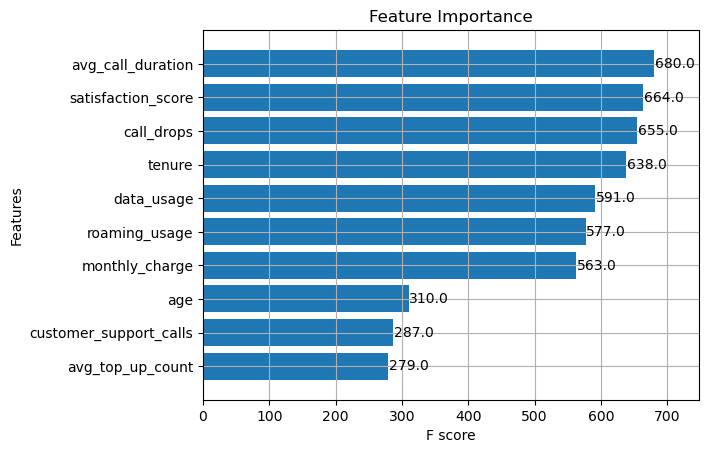

In [40]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Özellikler ve hedef değişkenin seçilmesi
X = df.drop(columns=['churn'])  # 'target' tahmin etmeye çalıştığınız sütun
y = df['churn']  # 'target' sütunu hedef değişkeniniz

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma ve eğitim
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

# Test verisi üzerinde tahminler yapma
y_pred = model.predict(X_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy * 100:.2f}%")

# Özelliklerin önem derecelerini görselleştirme
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance')
plt.show()

F1 Skoru: 0.11
AUC-ROC: 0.84


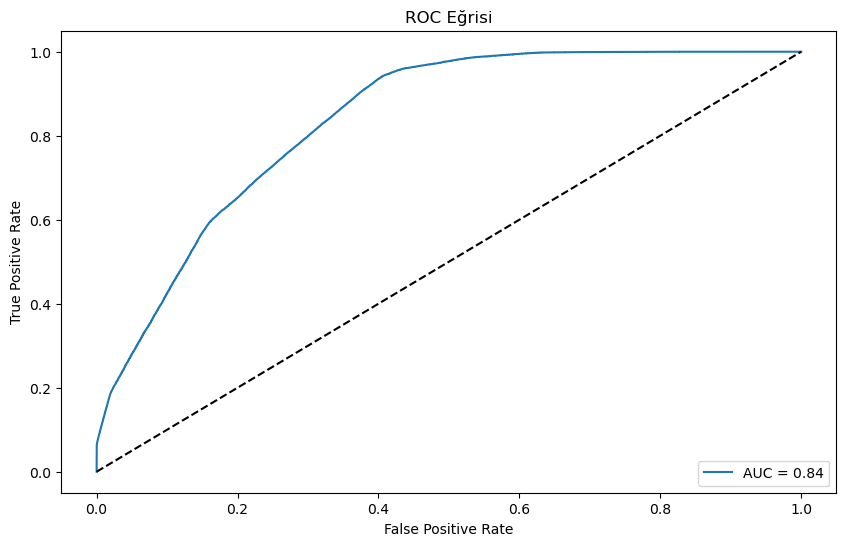

In [41]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# F1 skoru hesaplama
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.2f}")

# AUC-ROC hesaplama
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

# ROC eğrisini çizme
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin çizgisi
plt.title('ROC Eğrisi')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [42]:
from collections import Counter

class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  # Negatif sınıfı pozitif sınıfa böl

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [47]:
from sklearn.metrics import recall_score

# Test verisi üzerinde tahminler yapma
y_pred = model.predict(X_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy * 100:.2f}%")

# F1 skoru hesaplama
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.2f}")

# AUC-ROC hesaplama
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

# Recall hesaplama
recall = recall_score(y_test, y_pred)
print(f"Recall Skoru: {recall:.2f}")

Model Doğruluğu: 61.85%
F1 Skoru: 0.06
AUC-ROC: 0.84
Recall Skoru: 0.92


In [45]:
from imblearn.over_sampling import SMOTE

# Sadece eğitim setine SMOTE uygula
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modeli eğit
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train_smote, y_train_smote)

# Test setinde tahmin yap (test setine SMOTE uygulanmadı!)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # AUC-ROC için

MemoryError: Unable to allocate 1.57 GiB for an array with shape (7786858, 27) and data type float64

In [ ]:
# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy * 100:.2f}%")

# F1 skoru hesaplama
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.2f}")

# AUC-ROC hesaplama
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Modeli eğit
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_resampled, y_resampled)

# Test setinde tahmin yap (test setine SMOTE uygulanmadı!)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # AUC-ROC için

In [ ]:
# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy * 100:.2f}%")

# F1 skoru hesaplama
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.2f}")

# AUC-ROC hesaplama
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Eğitim ve test setine ayır (Dengeyi korumak için stratify kullanıyoruz)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE ve Random Under Sampling'i bir pipeline içinde birleştir
resampling_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
])

# Eğitim setine SMOTE + Under Sampling uygula
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Modeli eğit
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_resampled, y_resampled)

# Test setinde tahmin yap (test setine dokunmuyoruz!)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # AUC-ROC için

# Modeli değerlendirme
print("Model Performansı (SMOTE + Under Sampling Sonrası):")
print(classification_report(y_test, y_pred))  # Precision, Recall, F1 skoru

# AUC-ROC Skoru
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_roc:.4f}")

In [ ]:
# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy * 100:.2f}%")

# F1 skoru hesaplama
f1 = f1_score(y_test, y_pred)
print(f"F1 Skoru: {f1:.2f}")

# AUC-ROC hesaplama
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {auc_roc:.2f}")

In [48]:
conn.close()